In [32]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [33]:
df = pd.read_excel('dataset.xlsx', index=None)
df.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
0,2019-05-02,5BDN21B,11009,121000.0
1,2019-05-02,5BDN21B,14120,928200.0
2,2019-05-02,5BDN21B,16109,1452000.0
3,2019-05-02,5BDN21B,16140,-40600.0
4,2019-05-02,5BDN21B,62004,10000.0


In [34]:
df_grp = df.groupby(['SEDOL', 'BusinessDate']).sum()
df_grp

Position_Quantity_SD
SEDOL   BusinessDate                      
5BDN21B 2019-05-02               2254208.0
        2019-05-03               2249508.0
        2019-05-06               2303108.0
        2019-05-07               2206708.0
        2019-05-08               2188708.0
...                                    ...
74ZI41B 2019-09-04               3913907.0
        2019-09-05               3677907.0
        2019-09-06               3713907.0
        2019-09-09               1874907.0
        2019-09-10               2195907.0

[470 rows x 1 columns]

In [35]:
names=df.SEDOL.unique().tolist()
names

['5BDN21B', '5MJ2C1B', '6NY9V1B', '6Y3RH2B', '74ZI41B']

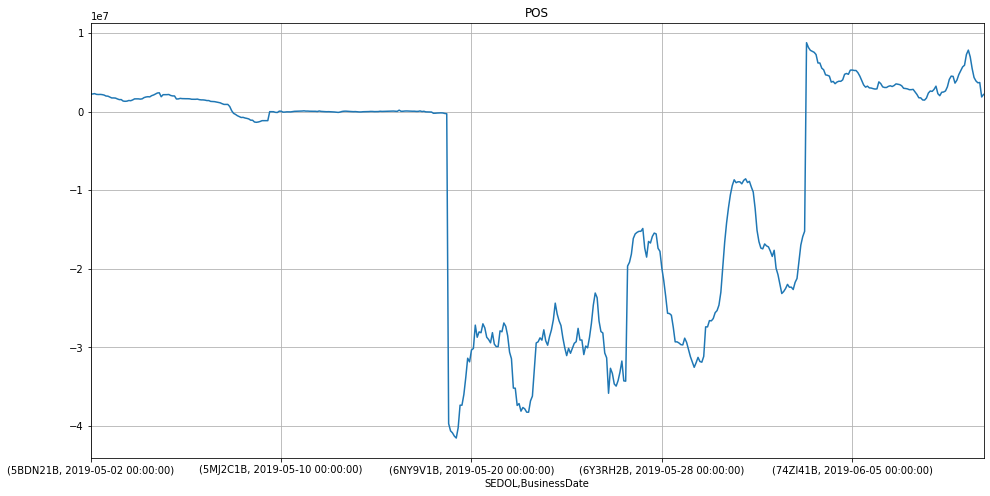

In [36]:
df_grp['Position_Quantity_SD'].plot.line(label='BC', figsize=(16,8), title='POS', grid=True)

## SEDOL1

In [55]:
df_sedol1 = df.loc[df.SEDOL=='5BDN21B']
df_sedol1.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
0,2019-05-02,5BDN21B,11009,121000.0
1,2019-05-02,5BDN21B,14120,928200.0
2,2019-05-02,5BDN21B,16109,1452000.0
3,2019-05-02,5BDN21B,16140,-40600.0
4,2019-05-02,5BDN21B,62004,10000.0


In [45]:
df_sedol1_edit = df_sedol1.groupby(['BusinessDate']).sum()
df_sedol1_edit.head()

,Position_Quantity_SD
BusinessDate,
2019-05-02,2254208.0
2019-05-03,2249508.0
2019-05-06,2303108.0
2019-05-07,2206708.0
2019-05-08,2188708.0


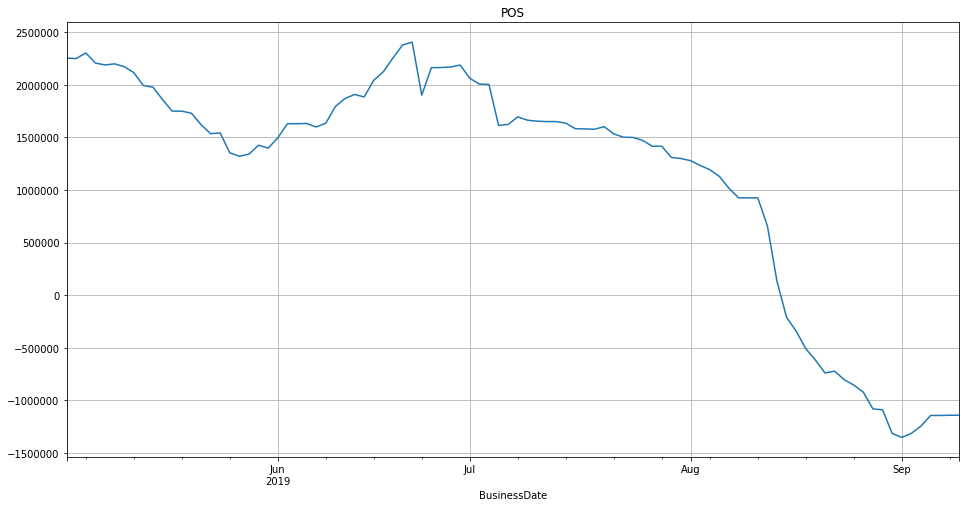

In [46]:
df_sedol1_edit['Position_Quantity_SD'].plot.line(label='SEDOL1', figsize=(16,8), title='POS', grid=True)

In [47]:
#Train the model on the last 29 days and predict the label for the 30th day
window = 30

num_samples = len(df_sedol1_edit) - window
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window + 1).astype(np.int)
len(indices)

64

In [48]:
data = df_sedol1_edit['Position_Quantity_SD'].values[indices]
data

array([[ 2254208.,  2249508.,  2303108., ...,  1793908.,  1869608.,
         1908308.],
       [ 2249508.,  2303108.,  2206708., ...,  1869608.,  1908308.,
         1884608.],
       [ 2303108.,  2206708.,  2188708., ...,  1908308.,  1884608.,
         2043008.],
       ...,
       [ 1416208.,  1416208.,  1309208., ..., -1244092., -1143592.,
        -1143592.],
       [ 1416208.,  1309208.,  1299108., ..., -1143592., -1143592.,
        -1141192.],
       [ 1309208.,  1299108.,  1279008., ..., -1143592., -1141192.,
        -1141192.]])

In [49]:
X = data[:, :-1]
y = data[:, -1]

In [50]:
split_frac = 0.8
split_indices = int(split_frac * num_samples)
X_train = X[:split_indices]
y_train = y[:split_indices]
X_test = X[split_indices:]
y_test = y[split_indices:]
split_indices

51

In [51]:
from sklearn.linear_model import LinearRegression

#Train
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#Inferences
y_pred_train_linear_reg = linear_reg_model.predict(X_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)

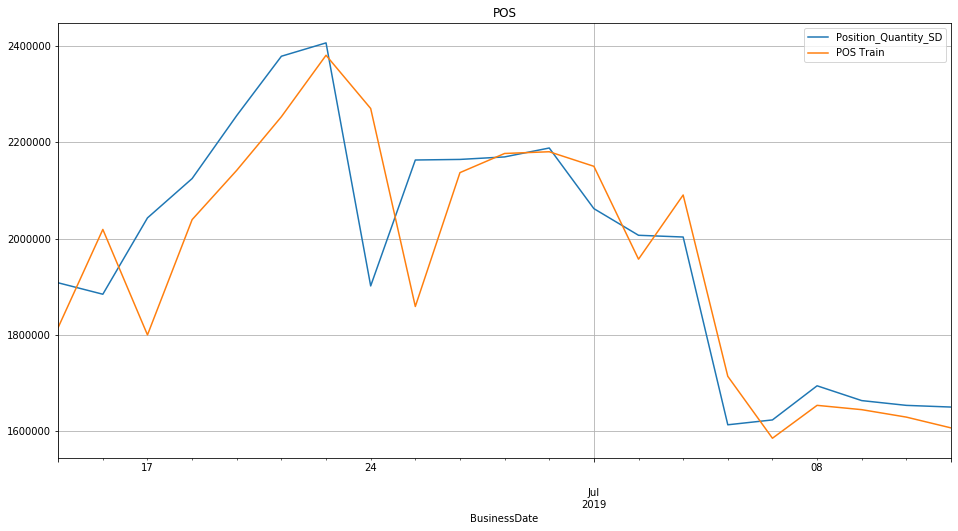

In [53]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol1_edit.copy()
df_linear = df_linear.iloc[window:split_indices]
df_linear['POS Train'] = y_pred_train_linear_reg[:-window]
df_linear.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

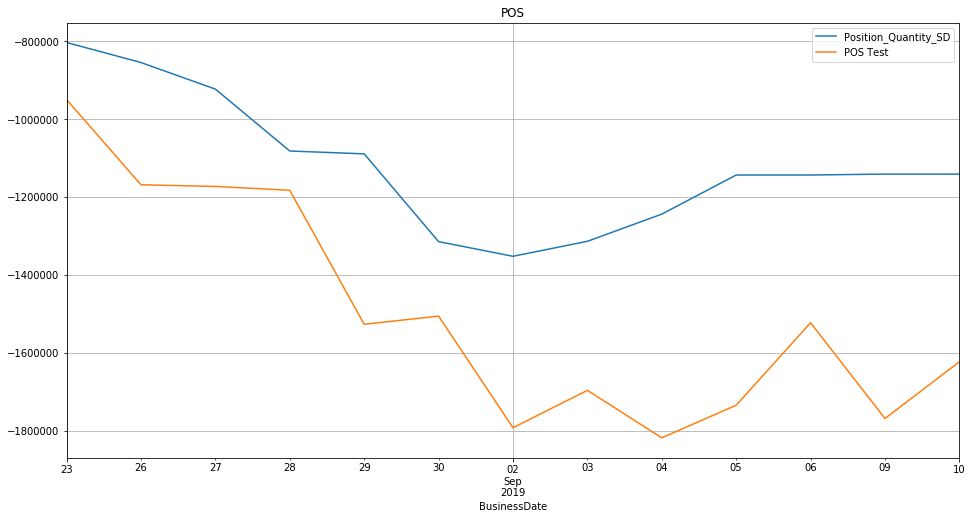

In [58]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol1_edit.copy()
df_linear = df_linear.iloc[split_indices+window:]
df_linear['POS Test'] = y_pred_linear_reg
df_linear.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

In [60]:
from sklearn.linear_model import Ridge

#Train
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

#Inferences
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

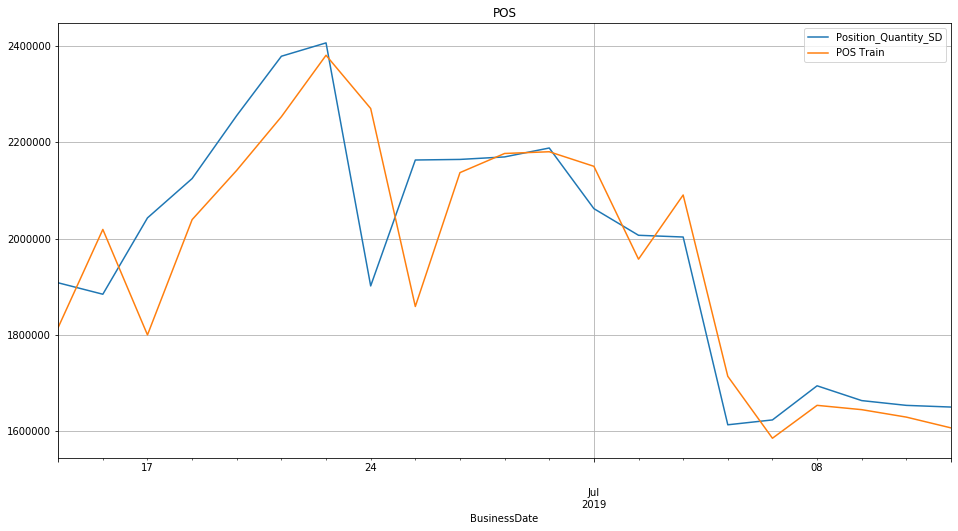

In [61]:
#Plot the graph for it has trained on the training data
df_ridge = df_sedol1_edit.copy()
df_ridge = df_ridge.iloc[window:split_indices]
df_ridge['POS Train'] = y_pred_train_ridge[:-window]
df_ridge.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

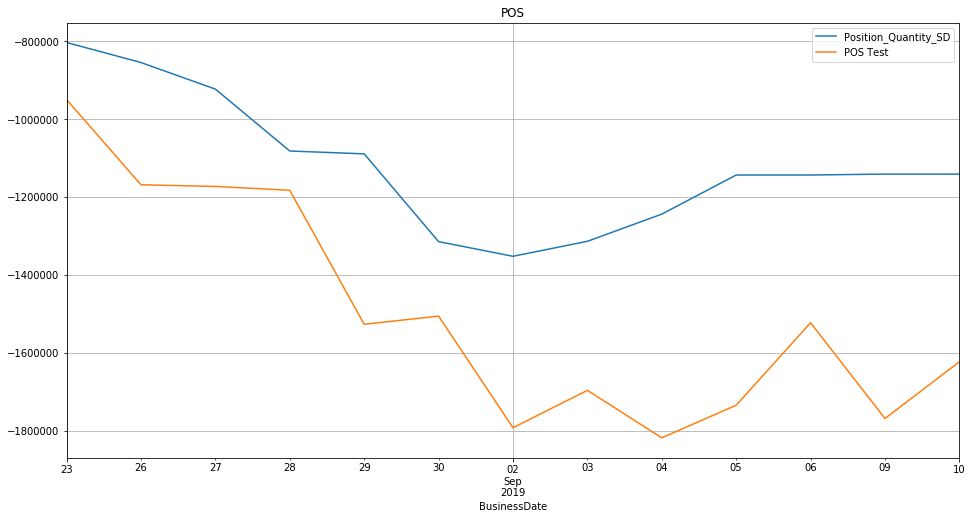

In [63]:
#Plot the graph for it has trained on the training data
df_ridge = df_sedol1_edit.copy()
df_ridge = df_ridge.iloc[split_indices+window:]
df_ridge['POS Test'] = y_pred_ridge
df_ridge.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

#Train
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

#Inferences
y_pred_train_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

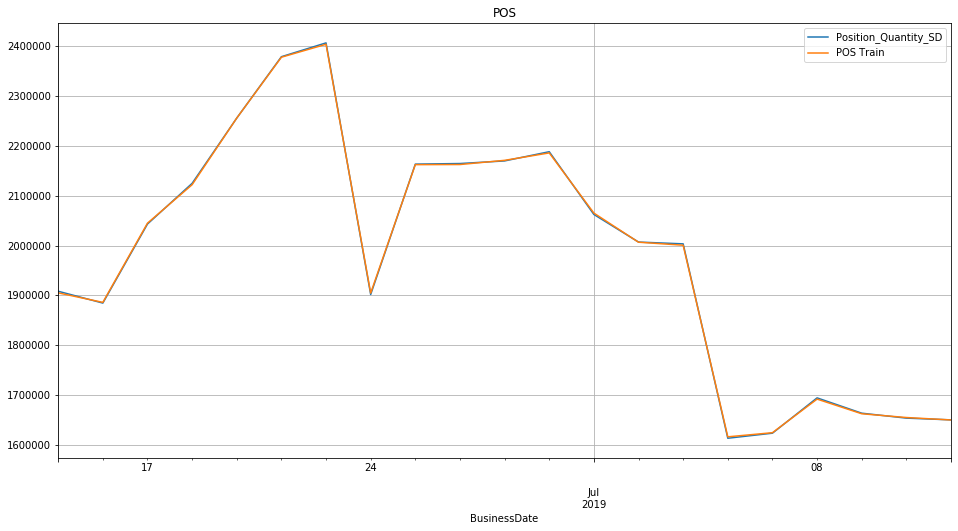

In [65]:
#Plot the graph for it has trained on the training data
df_gb = df_sedol1_edit.copy()
df_gb = df_gb.iloc[window:split_indices]
df_gb['POS Train'] = y_pred_train_gb[:-window]
df_gb.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

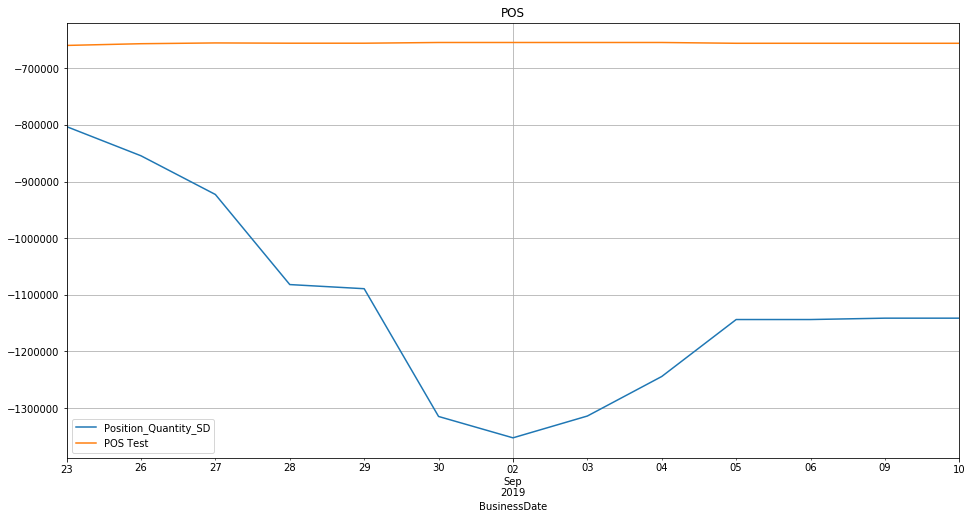

In [66]:
#Plot the graph for it has trained on the training data
df_gb = df_sedol1_edit.copy()
df_gb = df_gb.iloc[split_indices+window:]
df_gb['POS Test'] = y_pred_gb
df_gb.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

In [70]:
df_sedol1_edit['rolling_mean'] = df_sedol1_edit.Position_Quantity_SD.rolling(window=30).mean()
df_sedol1_edit.tail()

,Position_Quantity_SD,rolling_mean
BusinessDate,,
2019-09-04,-1244092.0,107194.666667
2019-09-05,-1143592.0,20021.333333
2019-09-06,-1143592.0,-65305.333333
2019-09-09,-1141192.0,-150552.000000
2019-09-10,-1141192.0,-232232.000000


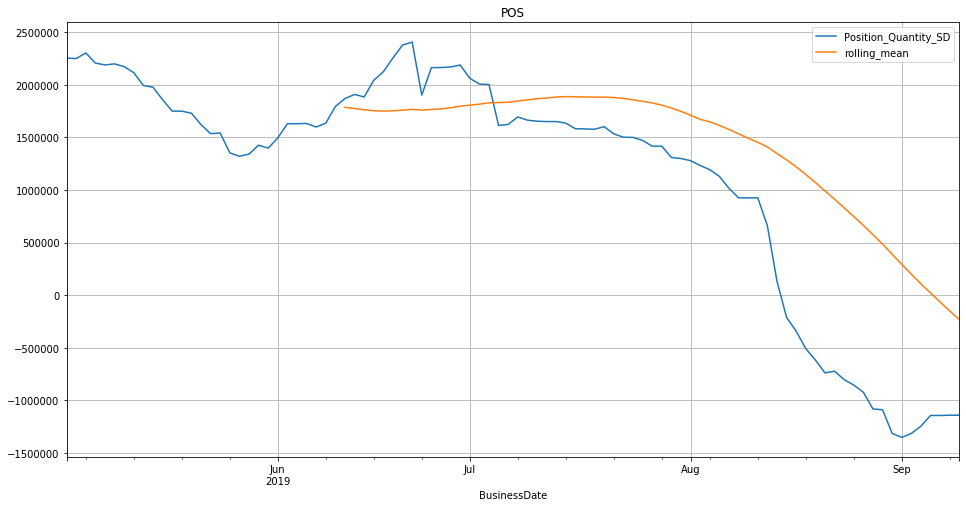

In [71]:
df_sedol1_edit.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

In [73]:
df_sedol1_edit['exp1'] = df_sedol1_edit.Position_Quantity_SD.ewm(span=30, adjust=False).mean()
df_sedol1_edit.tail()

,Position_Quantity_SD,rolling_mean,exp1
BusinessDate,,,
2019-09-04,-1244092.0,107194.666667,-145711.038973
2019-09-05,-1143592.0,20021.333333,-210090.455814
2019-09-06,-1143592.0,-65305.333333,-270316.361890
2019-09-09,-1141192.0,-150552.000000,-326501.886930
2019-09-10,-1141192.0,-232232.000000,-379062.539386


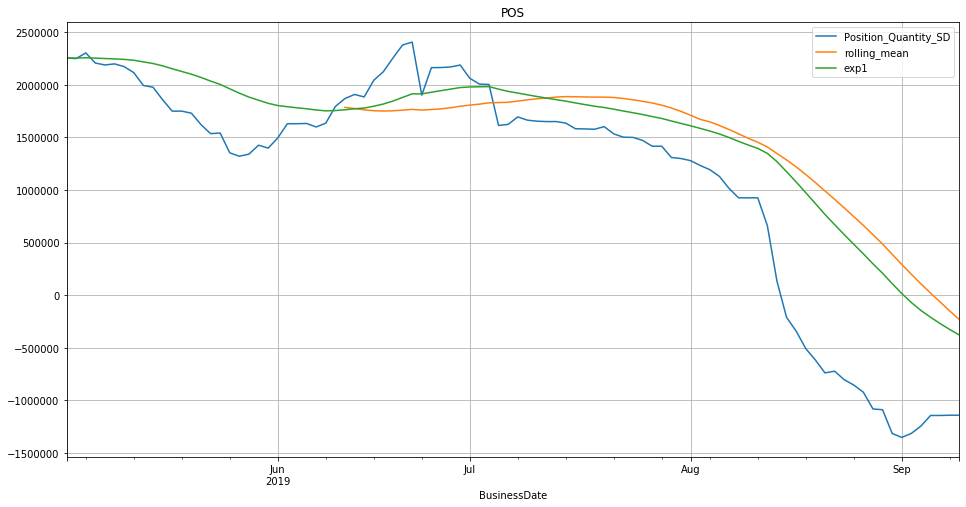

In [74]:
df_sedol1_edit.plot(label='SEDOL1', figsize=(16, 8), title='POS', grid=True)

## SEDOL2

In [38]:
df_sedol2 = df.loc[df.SEDOL=='5MJ2C1B']
df_sedol2.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
8,2019-05-02,5MJ2C1B,0010V,200.0
9,2019-05-02,5MJ2C1B,1003V,100.0
10,2019-05-02,5MJ2C1B,12280,10000.0
11,2019-05-02,5MJ2C1B,25SJP,-200.0
12,2019-05-02,5MJ2C1B,3210P,-151400.0


In [76]:
df_sedol2_edit = df_sedol2.groupby(['BusinessDate']).sum()
df_sedol2_edit.head()

,Position_Quantity_SD
BusinessDate,
2019-05-02,732.0
2019-05-03,732.0
2019-05-06,-4902.0
2019-05-07,-85468.0
2019-05-08,-102202.0


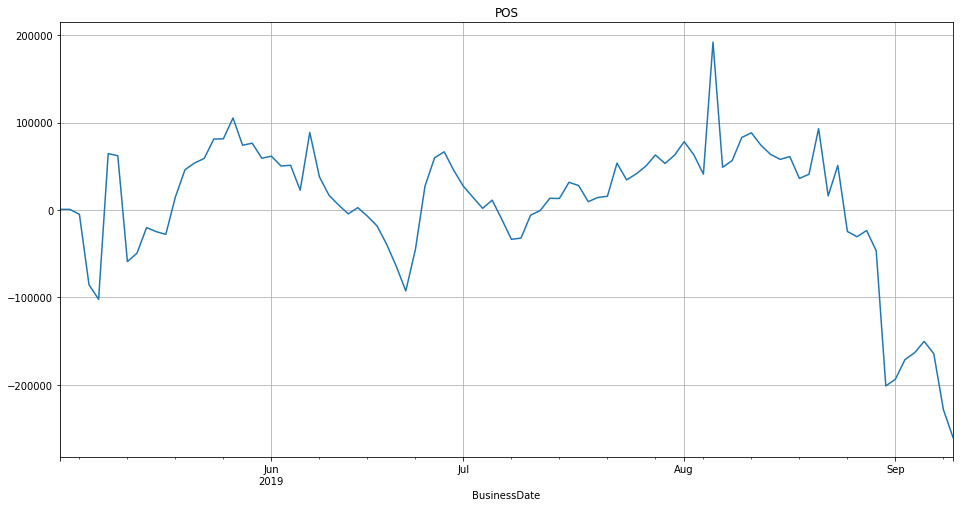

In [77]:
df_sedol2_edit['Position_Quantity_SD'].plot.line(label='SEDOL2', figsize=(16,8), title='POS', grid=True)

In [78]:
#Train the model on the last 29 days and predict the label for the 30th day
window = 30

num_samples = len(df_sedol2_edit) - window
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window + 1).astype(np.int)
len(indices)

64

In [79]:
data = df_sedol2_edit['Position_Quantity_SD'].values[indices]
data

array([[    732.,     732.,   -4902., ...,   16903.,    5703.,   -4402.],
       [    732.,   -4902.,  -85468., ...,    5703.,   -4402.,    2669.],
       [  -4902.,  -85468., -102202., ...,   -4402.,    2669.,   -7031.],
       ...,
       [  50113.,   62928.,   53219., ..., -163315., -150291., -164515.],
       [  62928.,   53219.,   62813., ..., -150291., -164515., -228391.],
       [  53219.,   62813.,   78214., ..., -164515., -228391., -260215.]])

In [80]:
X = data[:, :-1]
y = data[:, -1]

In [81]:
split_frac = 0.8
split_indices = int(split_frac * num_samples)
X_train = X[:split_indices]
y_train = y[:split_indices]
X_test = X[split_indices:]
y_test = y[split_indices:]
split_indices

51

In [83]:
from sklearn.linear_model import LinearRegression

#Train
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#Inferences
y_pred_train_linear_reg = linear_reg_model.predict(X_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)

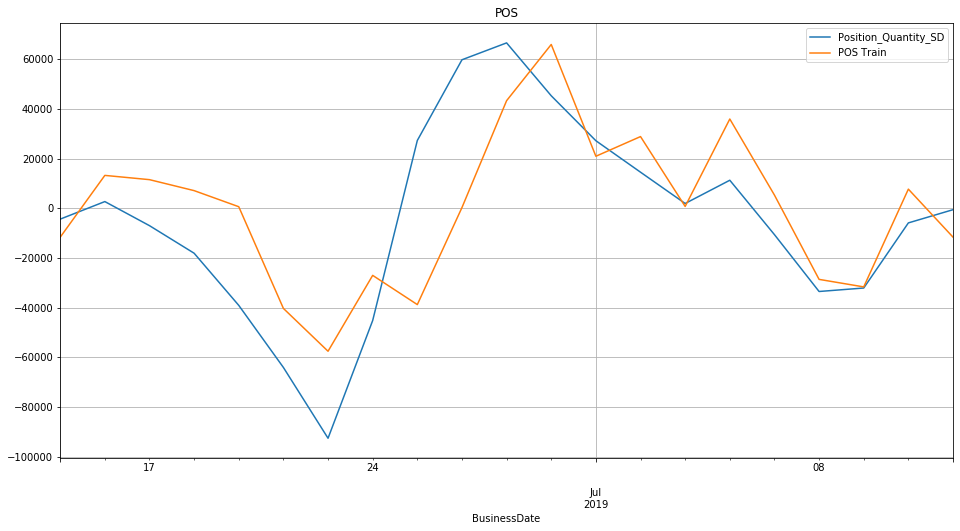

In [84]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol2_edit.copy()
df_linear = df_linear.iloc[window:split_indices]
df_linear['POS Train'] = y_pred_train_linear_reg[:-window]
df_linear.plot(label='SEDOL2', figsize=(16, 8), title='POS', grid=True)

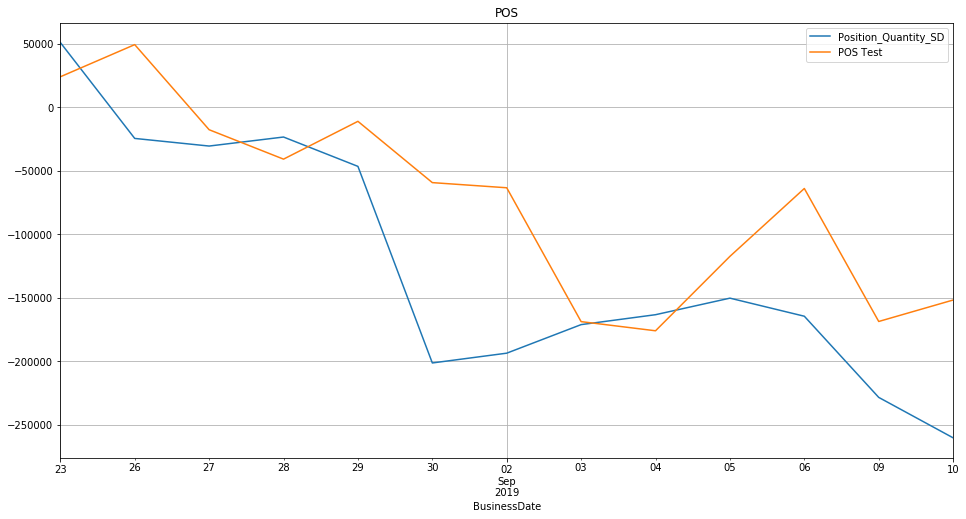

In [85]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol2_edit.copy()
df_linear = df_linear.iloc[split_indices+window:]
df_linear['POS Test'] = y_pred_linear_reg
df_linear.plot(label='SEDOL2', figsize=(16, 8), title='POS', grid=True)

In [86]:
df_sedol2_edit['rolling_mean'] = df_sedol2_edit.Position_Quantity_SD.rolling(window=30).mean()
df_sedol2_edit.tail()

,Position_Quantity_SD,rolling_mean
BusinessDate,,
2019-09-04,-163315.0,18702.700000
2019-09-05,-150291.0,12315.900000
2019-09-06,-164515.0,5161.633333
2019-09-09,-228391.0,-4549.000000
2019-09-10,-260215.0,-14996.800000


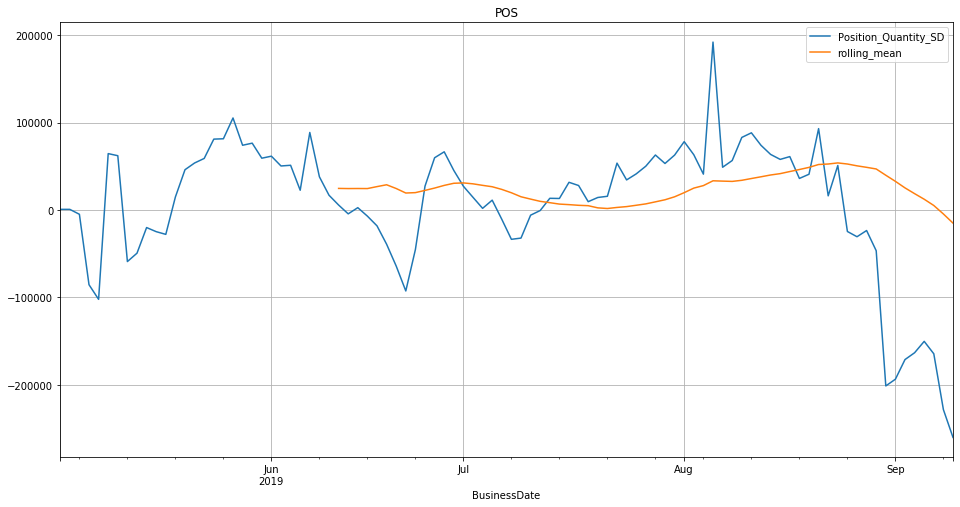

In [88]:
df_sedol2_edit.plot(label='SEDOL2', figsize=(16, 8), title='POS', grid=True)

In [89]:
df_sedol2_edit['exp1'] = df_sedol2_edit.Position_Quantity_SD.ewm(span=30, adjust=False).mean()
df_sedol2_edit.tail()

,Position_Quantity_SD,rolling_mean,exp1
BusinessDate,,,
2019-09-04,-163315.0,18702.700000,-18221.328766
2019-09-05,-150291.0,12315.900000,-26741.952717
2019-09-06,-164515.0,5161.633333,-35630.536412
2019-09-09,-228391.0,-4549.000000,-48066.695354
2019-09-10,-260215.0,-14996.800000,-61753.682750


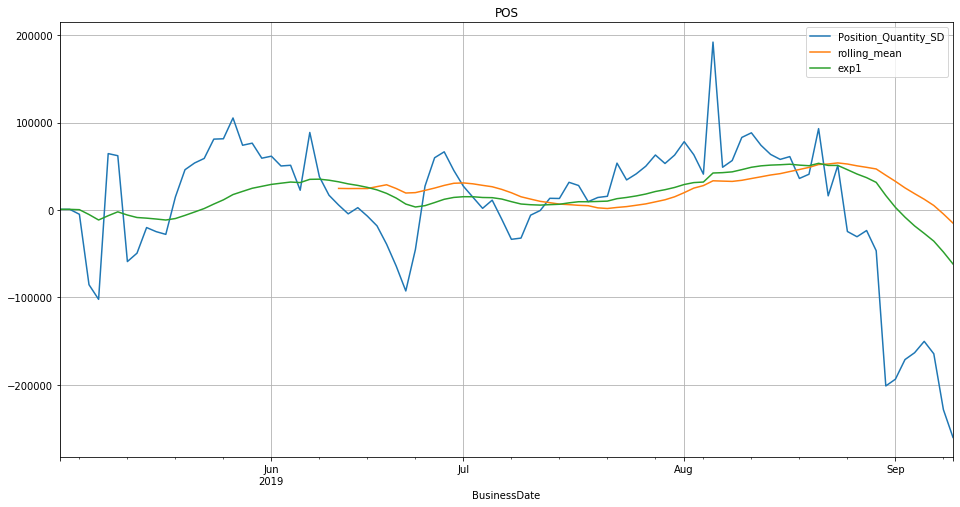

In [90]:
df_sedol2_edit.plot(label='SEDOL2', figsize=(16, 8), title='POS', grid=True)

## SEDOL3

In [39]:
df_sedol3 = df.loc[df.SEDOL=='6NY9V1B']
df_sedol3.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
32,2019-05-02,6NY9V1B,0130V,346000.0
33,2019-05-02,6NY9V1B,10240,-511000.0
34,2019-05-02,6NY9V1B,10240,-3281000.0
35,2019-05-02,6NY9V1B,10321,336530.0
36,2019-05-02,6NY9V1B,11009,964.0


In [91]:
df_sedol3_edit = df_sedol3.groupby(['BusinessDate']).sum()
df_sedol3_edit.head()

,Position_Quantity_SD
BusinessDate,
2019-05-02,-3.972417e+07
2019-05-03,-4.064518e+07
2019-05-06,-4.089717e+07
2019-05-07,-4.131317e+07
2019-05-08,-4.155817e+07


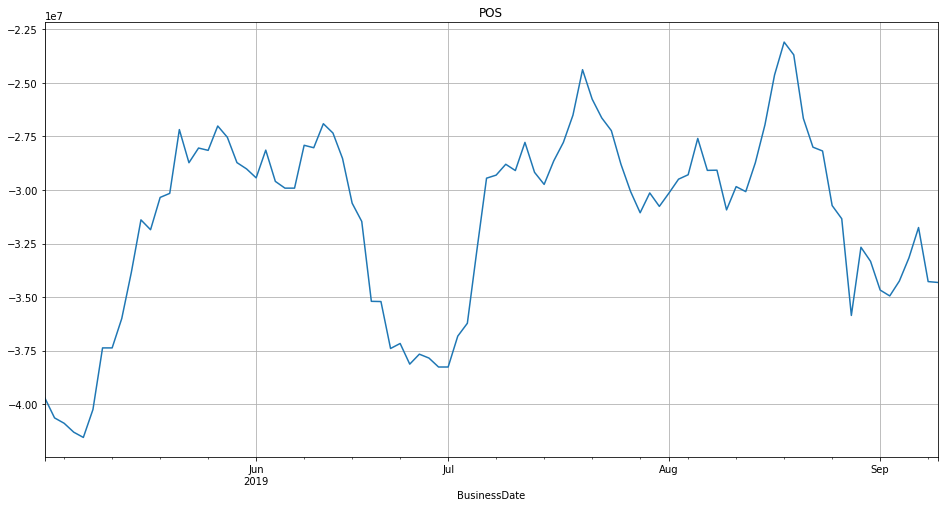

In [92]:
df_sedol3_edit['Position_Quantity_SD'].plot.line(label='SEDOL3', figsize=(16,8), title='POS', grid=True)

In [93]:
#Train the model on the last 29 days and predict the label for the 30th day
window = 30

num_samples = len(df_sedol3_edit) - window
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window + 1).astype(np.int)
len(indices)

64

In [94]:
data = df_sedol3_edit['Position_Quantity_SD'].values[indices]
data

array([[-39724168.        , -40645177.81059113, -40897168.        , ...,
        -28026744.        , -26904744.        , -27339744.        ],
       [-40645177.81059113, -40897168.        , -41313168.        , ...,
        -26904744.        , -27339744.        , -28530744.        ],
       [-40897168.        , -41313168.        , -41558168.        , ...,
        -27339744.        , -28530744.        , -30616744.        ],
       ...,
       [-30067708.        , -31063708.        , -30137708.        , ...,
        -34253708.        , -33168708.        , -31753708.        ],
       [-31063708.        , -30137708.        , -30765708.        , ...,
        -33168708.        , -31753708.        , -34278708.        ],
       [-30137708.        , -30765708.        , -30144708.        , ...,
        -31753708.        , -34278708.        , -34318708.        ]])

In [95]:
X = data[:, :-1]
y = data[:, -1]

In [96]:
split_frac = 0.8
split_indices = int(split_frac * num_samples)
X_train = X[:split_indices]
y_train = y[:split_indices]
X_test = X[split_indices:]
y_test = y[split_indices:]
split_indices

51

In [97]:
from sklearn.linear_model import LinearRegression

#Train
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#Inferences
y_pred_train_linear_reg = linear_reg_model.predict(X_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)

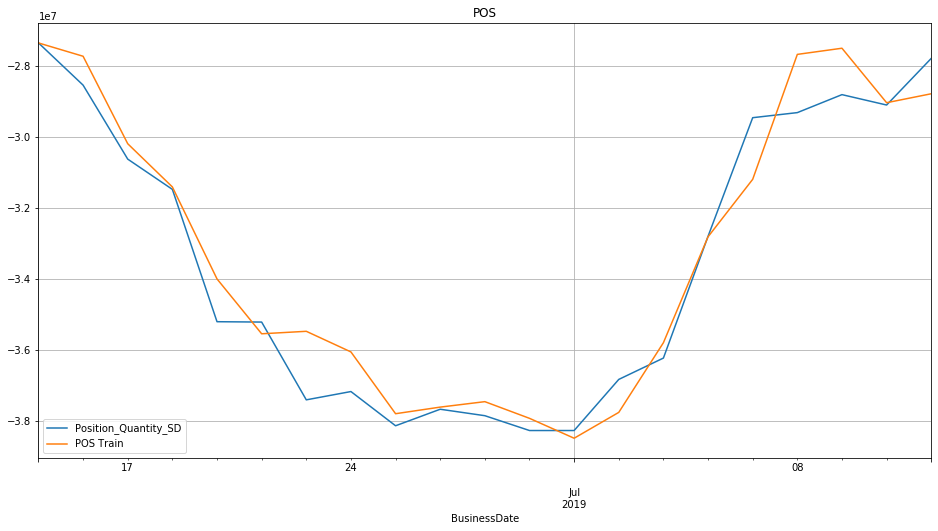

In [98]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol3_edit.copy()
df_linear = df_linear.iloc[window:split_indices]
df_linear['POS Train'] = y_pred_train_linear_reg[:-window]
df_linear.plot(label='SEDOL3', figsize=(16, 8), title='POS', grid=True)

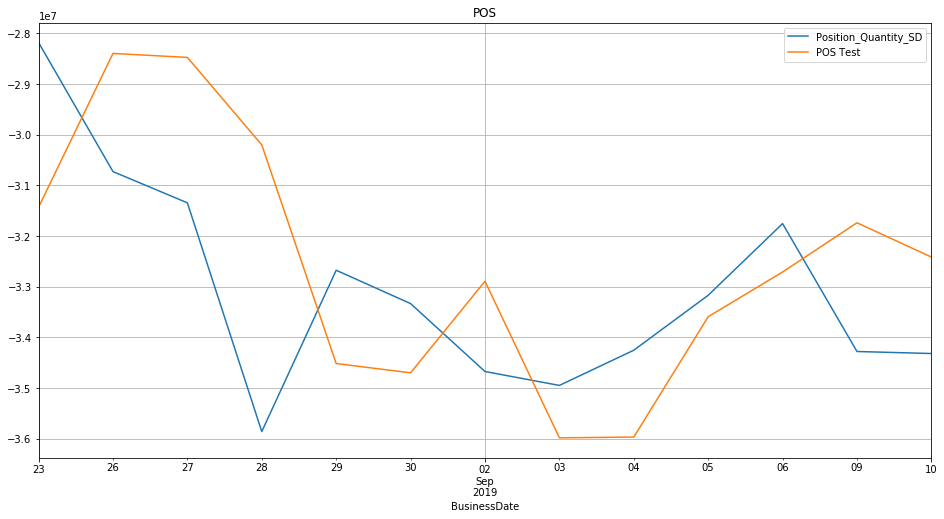

In [99]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol3_edit.copy()
df_linear = df_linear.iloc[split_indices+window:]
df_linear['POS Test'] = y_pred_linear_reg
df_linear.plot(label='SEDOL3', figsize=(16, 8), title='POS', grid=True)

In [101]:
df_sedol3_edit['rolling_mean'] = df_sedol3_edit.Position_Quantity_SD.rolling(window=30).mean()
df_sedol3_edit.tail()

,Position_Quantity_SD,rolling_mean
BusinessDate,,
2019-09-04,-34253708.0,-2.980320e+07
2019-09-05,-33168708.0,-2.994886e+07
2019-09-06,-31753708.0,-3.000506e+07
2019-09-09,-34278708.0,-3.011223e+07
2019-09-10,-34318708.0,-3.025160e+07


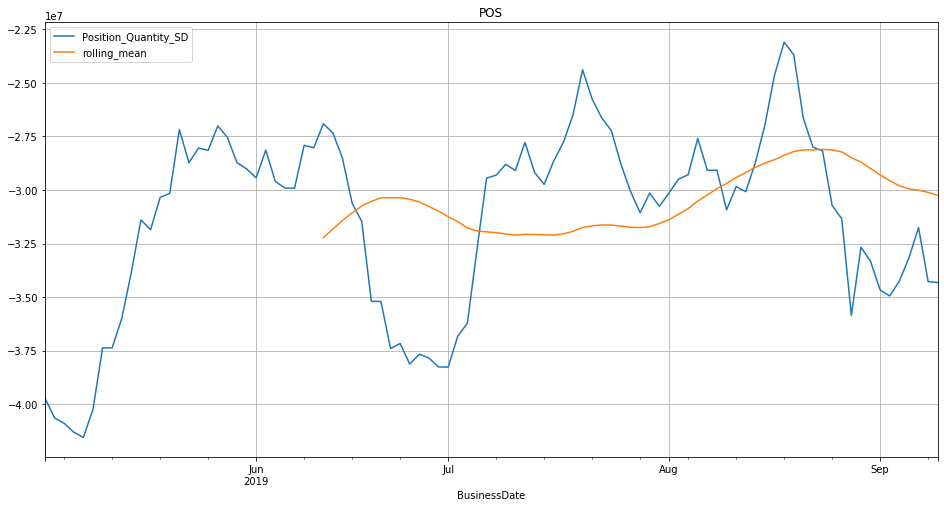

In [102]:
df_sedol3_edit.plot(label='SEDOL3', figsize=(16, 8), title='POS', grid=True)

In [103]:
df_sedol3_edit['exp1'] = df_sedol3_edit.Position_Quantity_SD.ewm(span=30, adjust=False).mean()
df_sedol3_edit.tail()

,Position_Quantity_SD,rolling_mean,exp1
BusinessDate,,,
2019-09-04,-34253708.0,-2.980320e+07,-3.056616e+07
2019-09-05,-33168708.0,-2.994886e+07,-3.073407e+07
2019-09-06,-31753708.0,-3.000506e+07,-3.079985e+07
2019-09-09,-34278708.0,-3.011223e+07,-3.102430e+07
2019-09-10,-34318708.0,-3.025160e+07,-3.123684e+07


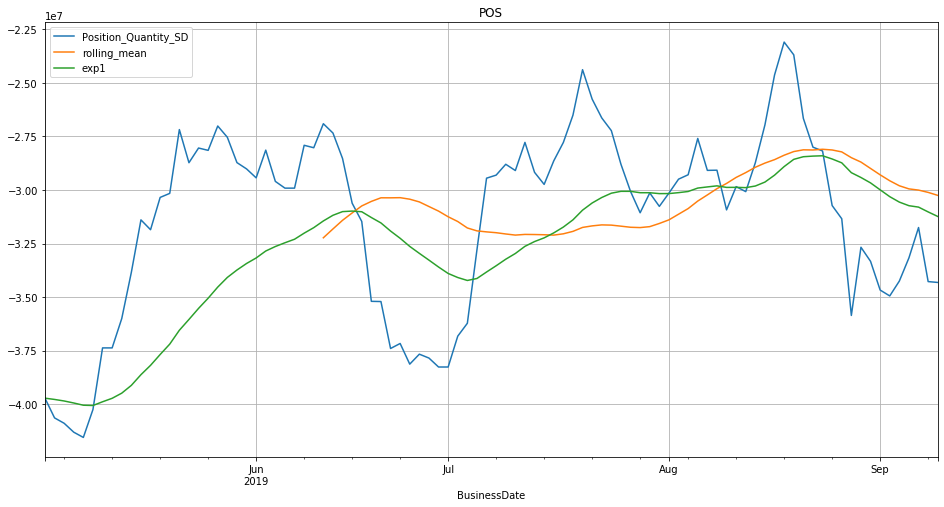

In [105]:
df_sedol3_edit.plot(label='SEDOL3', figsize=(16, 8), title='POS', grid=True)

## SEDOL4

In [40]:
df_sedol4 = df.loc[df.SEDOL=='6Y3RH2B']
df_sedol4.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
64,2019-05-02,6Y3RH2B,10240,-112000.0
65,2019-05-02,6Y3RH2B,10240,-373000.0
66,2019-05-02,6Y3RH2B,10321,173000.0
67,2019-05-02,6Y3RH2B,1310P,-202000.0
68,2019-05-02,6Y3RH2B,1310V,520000.0


In [106]:
df_sedol4_edit = df_sedol4.groupby(['BusinessDate']).sum()
df_sedol4_edit.head()

,Position_Quantity_SD
BusinessDate,
2019-05-02,-19662000.0
2019-05-03,-19176000.0
2019-05-06,-18134000.0
2019-05-07,-16142000.0
2019-05-08,-15565000.0


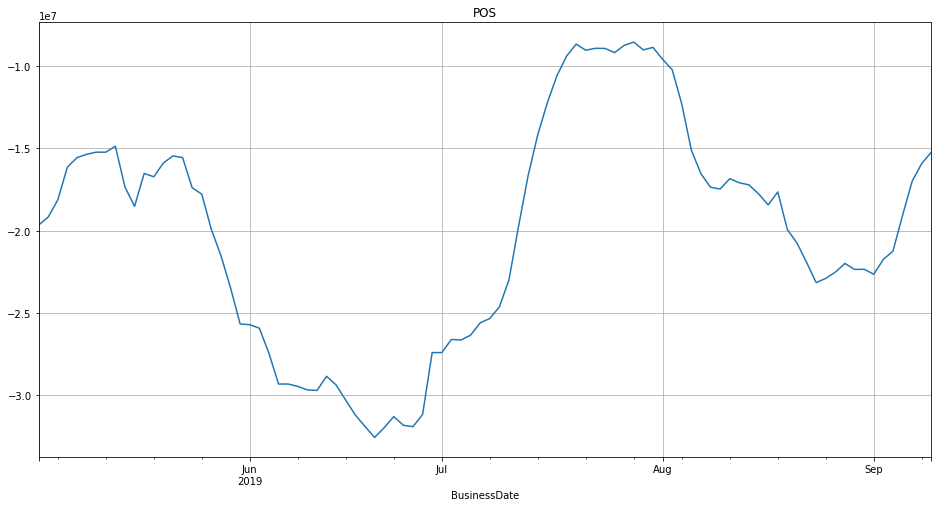

In [107]:
df_sedol4_edit['Position_Quantity_SD'].plot.line(label='SEDOL4', figsize=(16,8), title='POS', grid=True)

In [108]:
#Train the model on the last 29 days and predict the label for the 30th day
window = 30

num_samples = len(df_sedol4_edit) - window
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window + 1).astype(np.int)
len(indices)

64

In [109]:
data = df_sedol4_edit['Position_Quantity_SD'].values[indices]
data

array([[-19662000., -19176000., -18134000., ..., -29666000., -29700000.,
        -28841000.],
       [-19176000., -18134000., -16142000., ..., -29700000., -28841000.,
        -29372000.],
       [-18134000., -16142000., -15565000., ..., -28841000., -29372000.,
        -30296000.],
       ...,
       [ -8747000.,  -8549000.,  -9023000., ..., -21241000., -19065000.,
        -16994000.],
       [ -8549000.,  -9023000.,  -8872000., ..., -19065000., -16994000.,
        -15916000.],
       [ -9023000.,  -8872000.,  -9592000., ..., -16994000., -15916000.,
        -15230000.]])

In [110]:
X = data[:, :-1]
y = data[:, -1]

In [111]:
split_frac = 0.8
split_indices = int(split_frac * num_samples)
X_train = X[:split_indices]
y_train = y[:split_indices]
X_test = X[split_indices:]
y_test = y[split_indices:]
split_indices

51

In [112]:
from sklearn.linear_model import LinearRegression

#Train
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#Inferences
y_pred_train_linear_reg = linear_reg_model.predict(X_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)

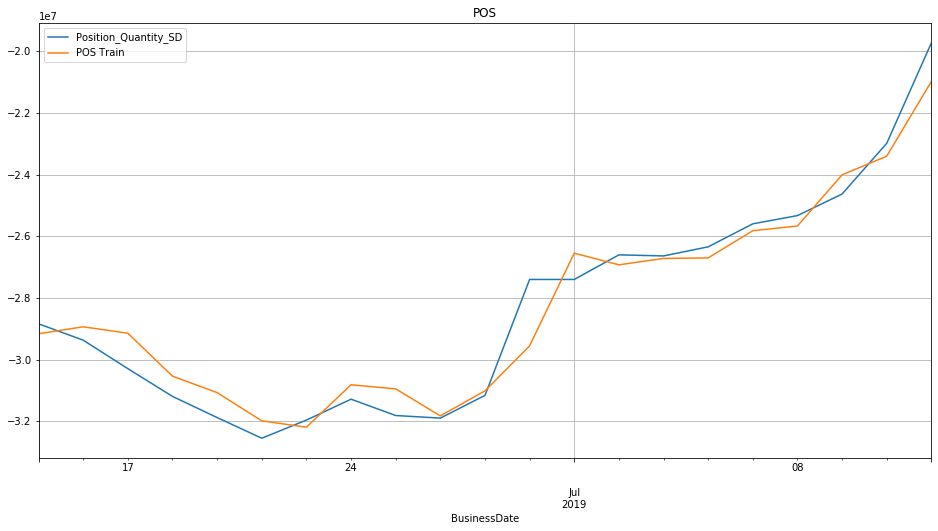

In [113]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol4_edit.copy()
df_linear = df_linear.iloc[window:split_indices]
df_linear['POS Train'] = y_pred_train_linear_reg[:-window]
df_linear.plot(label='SEDOL4', figsize=(16, 8), title='POS', grid=True)

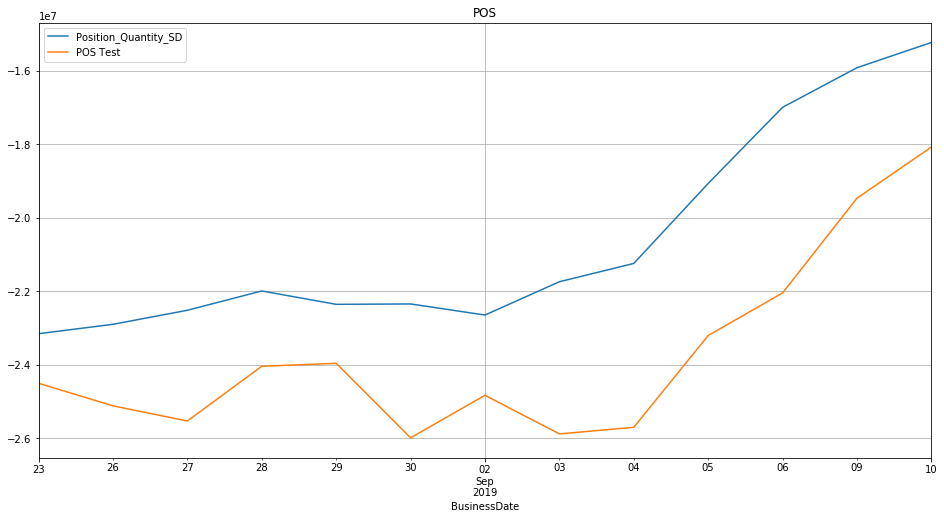

In [114]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol4_edit.copy()
df_linear = df_linear.iloc[split_indices+window:]
df_linear['POS Test'] = y_pred_linear_reg
df_linear.plot(label='SEDOL4', figsize=(16, 8), title='POS', grid=True)

In [116]:
df_sedol4_edit['rolling_mean'] = df_sedol4_edit.Position_Quantity_SD.rolling(window=30).mean()
df_sedol4_edit.tail()

,Position_Quantity_SD,rolling_mean
BusinessDate,,
2019-09-04,-21241000.0,-1.704940e+07
2019-09-05,-19065000.0,-1.737863e+07
2019-09-06,-16994000.0,-1.765353e+07
2019-09-09,-15916000.0,-1.789910e+07
2019-09-10,-15230000.0,-1.810600e+07


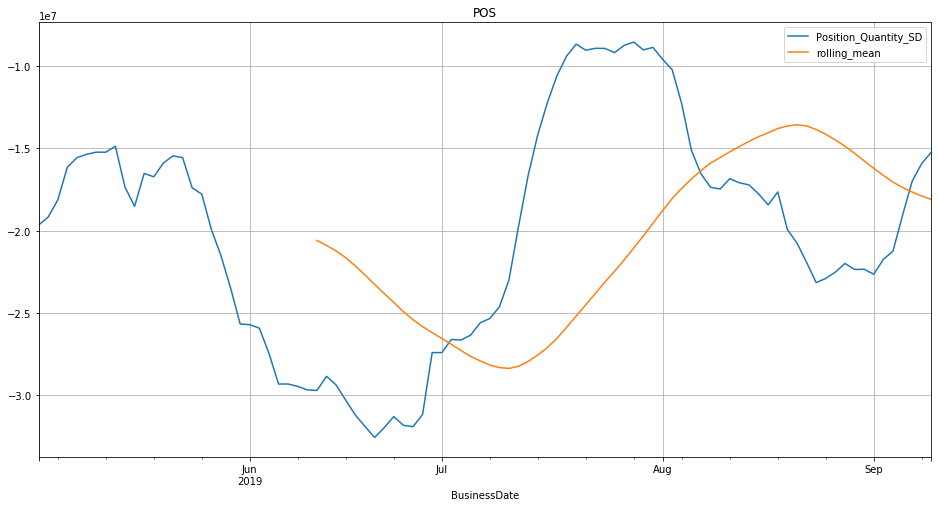

In [117]:
df_sedol4_edit.plot(label='SEDOL4', figsize=(16, 8), title='POS', grid=True)

In [118]:
df_sedol4_edit['exp1'] = df_sedol4_edit.Position_Quantity_SD.ewm(span=30, adjust=False).mean()
df_sedol4_edit.tail()

,Position_Quantity_SD,rolling_mean,exp1
BusinessDate,,,
2019-09-04,-21241000.0,-1.704940e+07,-1.939856e+07
2019-09-05,-19065000.0,-1.737863e+07,-1.937704e+07
2019-09-06,-16994000.0,-1.765353e+07,-1.922329e+07
2019-09-09,-15916000.0,-1.789910e+07,-1.900992e+07
2019-09-10,-15230000.0,-1.810600e+07,-1.876605e+07


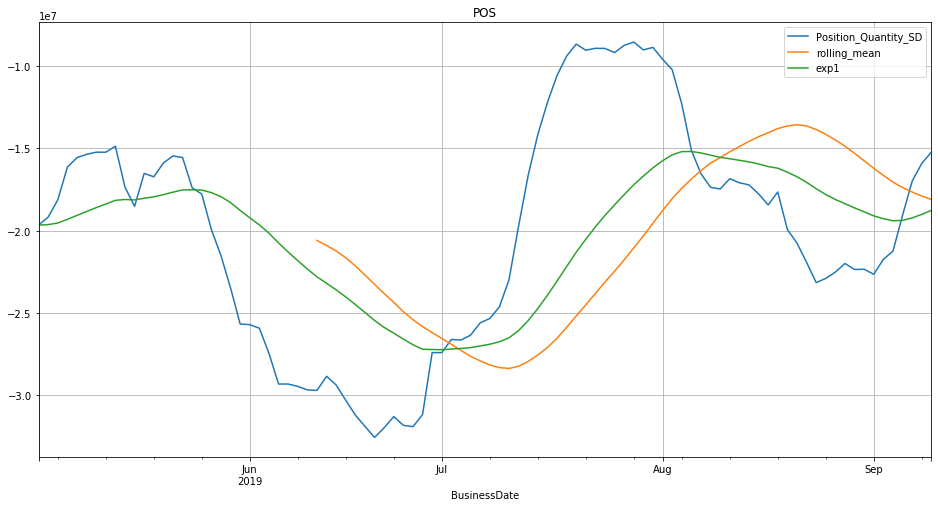

In [119]:
df_sedol4_edit.plot(label='SEDOL4', figsize=(16, 8), title='POS', grid=True)

## SEDOL5

In [41]:
df_sedol5 = df.loc[df.SEDOL=='74ZI41B']
df_sedol5.head()

,BusinessDate,SEDOL,Counterparty_Account_ID,Position_Quantity_SD
87,2019-05-02,74ZI41B,1003V,697000.0
88,2019-05-02,74ZI41B,10240,4000.0
89,2019-05-02,74ZI41B,10240,557000.0
90,2019-05-02,74ZI41B,10321,433000.0
91,2019-05-02,74ZI41B,12210,164000.0


In [120]:
df_sedol5_edit = df_sedol5.groupby(['BusinessDate']).sum()
df_sedol5_edit.head()

,Position_Quantity_SD
BusinessDate,
2019-05-02,8785907.0
2019-05-03,8177907.0
2019-05-06,7815907.0
2019-05-07,7686907.0
2019-05-08,7561907.0


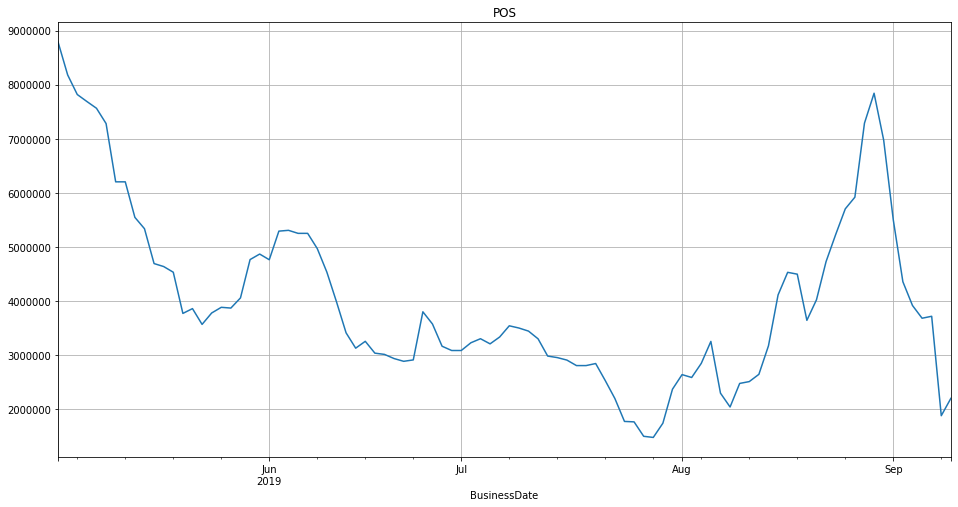

In [121]:
df_sedol5_edit['Position_Quantity_SD'].plot.line(label='SEDOL5', figsize=(16,8), title='POS', grid=True)

In [122]:
#Train the model on the last 29 days and predict the label for the 30th day
window = 30

num_samples = len(df_sedol5_edit) - window
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window + 1).astype(np.int)
len(indices)

64

In [124]:
data = df_sedol5_edit['Position_Quantity_SD'].values[indices]
data

array([[8785907., 8177907., 7815907., ..., 4529907., 3982907., 3407907.],
       [8177907., 7815907., 7686907., ..., 3982907., 3407907., 3123907.],
       [7815907., 7686907., 7561907., ..., 3407907., 3123907., 3250907.],
       ...,
       [1493907., 1472907., 1735907., ..., 3913907., 3677907., 3713907.],
       [1472907., 1735907., 2364907., ..., 3677907., 3713907., 1874907.],
       [1735907., 2364907., 2634907., ..., 3713907., 1874907., 2195907.]])

In [125]:
X = data[:, :-1]
y = data[:, -1]

In [126]:
split_frac = 0.8
split_indices = int(split_frac * num_samples)
X_train = X[:split_indices]
y_train = y[:split_indices]
X_test = X[split_indices:]
y_test = y[split_indices:]
split_indices

51

In [127]:
from sklearn.linear_model import LinearRegression

#Train
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#Inferences
y_pred_train_linear_reg = linear_reg_model.predict(X_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)

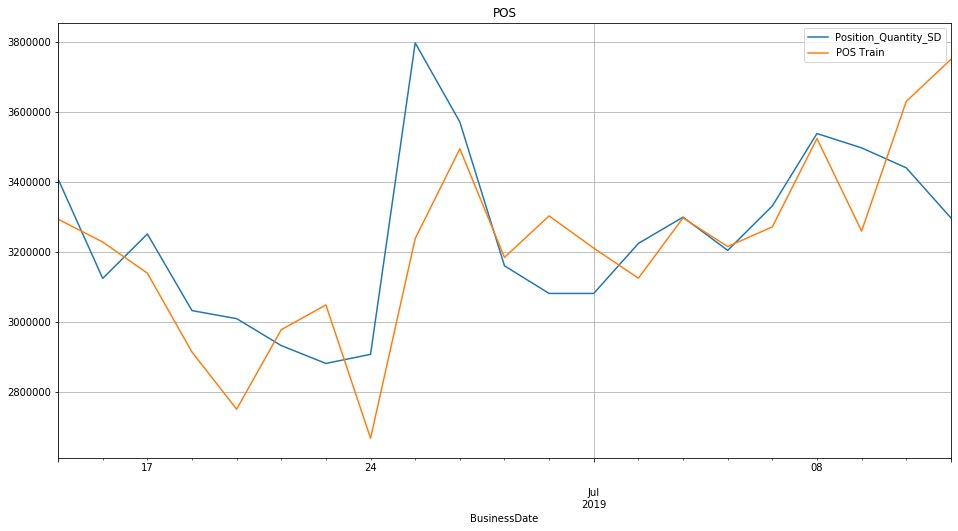

In [128]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol5_edit.copy()
df_linear = df_linear.iloc[window:split_indices]
df_linear['POS Train'] = y_pred_train_linear_reg[:-window]
df_linear.plot(label='SEDOL5', figsize=(16, 8), title='POS', grid=True)

In [ ]:
#Plot the graph for it has trained on the training data
df_linear = df_sedol5_edit.copy()
df_linear = df_linear.iloc[split_indices+window:]
df_linear['POS Test'] = y_pred_linear_reg
df_linear.plot(label='SEDOL4', figsize=(16, 8), title='POS', grid=True)